In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
T = 100.0
dt= 0.02
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

In [3]:
t = numpy.arange(0.0, 100.02, 0.02)

In [4]:
#initial values
z0 = 100.0
zt = 100.0
g = 9.81

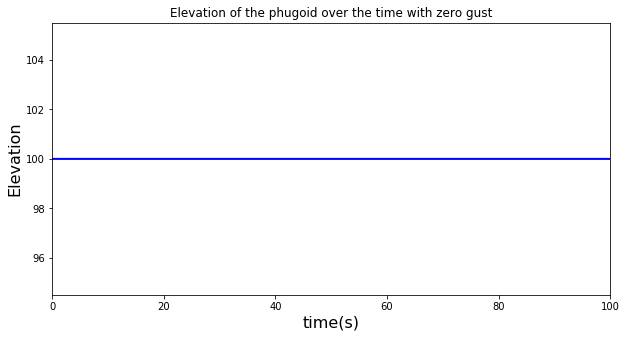

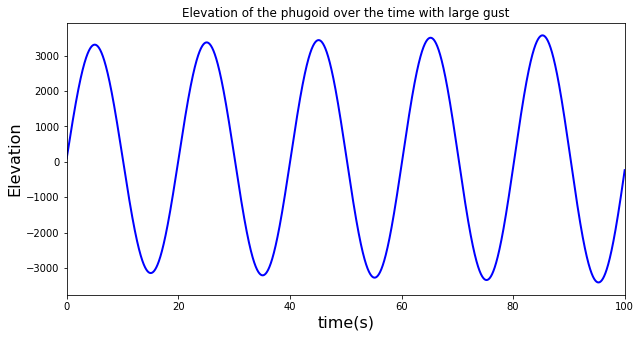

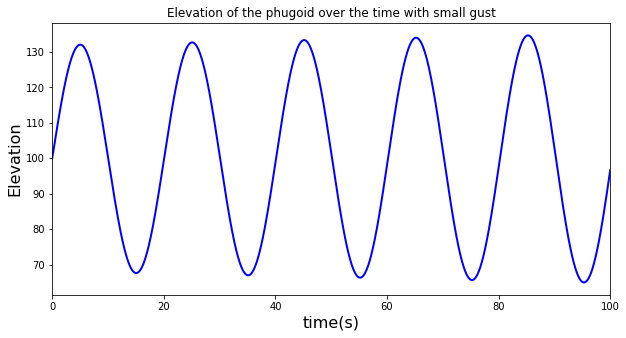

In [5]:
###### Small gust

b0 = 0.0
u = numpy.array([z0, b0])
z = numpy.zeros(N)
z[0] = z0
for n in range(1, N):
        rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt * rhs
        z[n] = u[0]
        
pyplot.figure(figsize=(10.0, 5.0))
pyplot.title('Elevation of the phugoid over the time with zero gust') 
pyplot.ylabel('Elevation', fontsize = 16)
pyplot.xlabel('time(s)', fontsize = 16)
pyplot.xlim(60, 140)
pyplot.xlim(0.0, t[5000])
pyplot.plot(t,z, color = 'b', linewidth = 2)

#######Large gust
b0 = 1000.0
u = numpy.array([z0, b0])
z = numpy.zeros(N)
z[0] = z0
for n in range(1, N):
        rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt * rhs
        z[n] = u[0]
        
pyplot.figure(figsize=(10.0, 5.0))
pyplot.title('Elevation of the phugoid over the time with large gust') 
pyplot.ylabel('Elevation', fontsize = 16)
pyplot.xlabel('time(s)', fontsize = 16)
pyplot.xlim(60, 140)
pyplot.xlim(0.0, t[5000])
pyplot.plot(t,z, color = 'b', linewidth = 2)

b0 = 10.0
u = numpy.array([z0, b0])
z = numpy.zeros(N)
z[0] = z0
for n in range(1, N):
        rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt * rhs
        z[n] = u[0]
pyplot.figure(figsize=(10.0, 5.0))
pyplot.title('Elevation of the phugoid over the time with small gust') 
pyplot.ylabel('Elevation', fontsize = 16)
pyplot.xlabel('time(s)', fontsize = 16)
pyplot.xlim(60, 140)
pyplot.xlim(0.0, t[5000])
pyplot.plot(t,z, color = 'b', linewidth = 2)

1. For small gust amplitude of oscillation decreases.
2. For larger gust amplitude of oscillation increases.
3. for zero gust there is no oscilation.

In [6]:
z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5 * t) +
           (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)

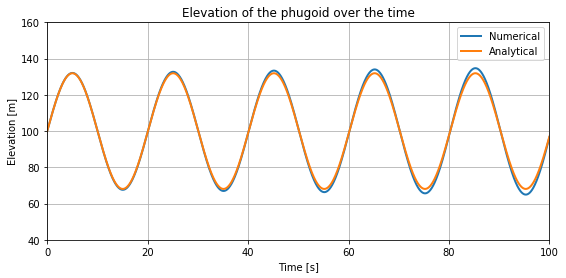

In [7]:
pyplot.figure(figsize=(9.0, 4.0))
pyplot.title('Elevation of the phugoid over the time')  
pyplot.xlabel('Time [s]')  # set the x-axis label
pyplot.ylabel('Elevation [m]')  # set the y-axis label
pyplot.xlim(t[0], t[-1])  # set the x-axis limits
pyplot.ylim(40.0, 160.0)  # set the y-axis limits
pyplot.grid()  # set a background grid to improve readability
pyplot.plot(t, z, label='Numerical',
            color='C0', linestyle='-', linewidth=2)
pyplot.plot(t, z_exact, label='Analytical',
            color='C1', linestyle='-', linewidth=2)
pyplot.legend();  # set the legend

In [14]:
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]

z_values = []

for dt in dt_values:
    N = int(T / dt) + 1  
    t = numpy.linspace(0.0, T, num=N)
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    for n in range(1, N):
        rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
        u = u + dt * rhs
        z[n] = u[0]  
    z_values.append(z) 

10.0

In [9]:
def l1_error(z, z_exact, dt):
    error = dt * numpy.sum(numpy.abs(z - z_exact))
    return error

error_values = []
for z, dt in zip(z_values, dt_values):
    N = int(T / dt) + 1  
    t = numpy.linspace(0.0, T, num=N) 
    z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5 * t) +
               (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)
    error_values.append(l1_error(z, z_exact, dt))

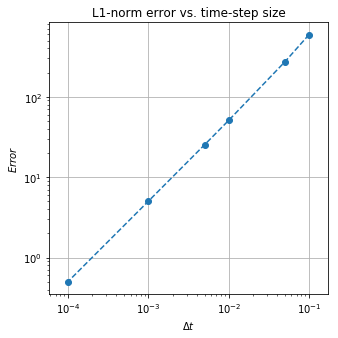

In [10]:
pyplot.figure(figsize=(5.0, 5.0))
pyplot.title('L1-norm error vs. time-step size')
pyplot.xlabel('$\Delta t$')
pyplot.ylabel('$Error$')
pyplot.grid()
pyplot.loglog(dt_values, error_values,
              color='C0', linestyle='--', marker='o') 
pyplot.axis('equal');

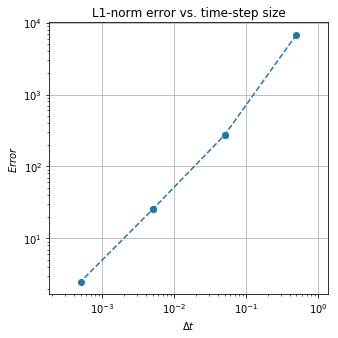

In [16]:
###################### ChallengingTask######################

def EulersMethod(z0, b0, dt_values):
    z_values = []

    for dt in dt_values:
        N = int(T / dt) + 1  
        t = numpy.linspace(0.0, T, num=N)
        u = numpy.array([z0, b0])
        z = numpy.empty_like(t)
        z[0] = z0
    
        for n in range(1, N):
            rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
            u = u + dt * rhs
            z[n] = u[0]  
        z_values.append(z)
        
    return z_values


dt_values = [0.5, 0.05, 0.05, 0.005, 0.005, 0.0005]
z0 = 100.0
b0 = 10.0

z_values=EulersMethod(z0, b0, dt_values)    

error_values = []
for z, dt in zip(z_values, dt_values):
    N = int(T / dt) + 1  
    t = numpy.linspace(0.0, T, num=N) 
    z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5 * t) +
               (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)
    error_values.append(l1_error(z, z_exact, dt))    
    
pyplot.figure(figsize=(5.0, 5.0))
pyplot.title('L1-norm error vs. time-step size')
pyplot.xlabel('$\Delta t$')
pyplot.ylabel('$Error$')
pyplot.grid()
pyplot.loglog(dt_values, error_values,
              color='C0', linestyle='--', marker='o') 
pyplot.axis('equal');    
    
    
    
    
    